## Import các thư viện cần thiết

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

## Thu thập dữ liệu

Trong bài này, ta sử dụng thư viện `Beautiful Soup` để cào dữ liệu từ trang [Wolrdometer](https://www.worldometers.info/coronavirus/) vào mỗi **10:00** hằng ngày.

Bên cạnh đó, dữ liệu của `Area` (Diện tích) và `Continent` (Châu lục) được nhóm chúng tôi lấy ở trang [Wikipedia](https://www.wikipedia.org/)

Chú ý rằng, ta được phép sử dụng bộ dữ liệu này cho mục đích học tập.

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [45]:
data = pd.read_csv('data/covid_data.csv')
data.head()

,Date,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,2022-04-21,China,193953,2841.0,4663.0,8.0,157869.0,2185.0,31421.0,223.0,135.0,3.0,160000000.0,111163.0,1.439324e+09
1,2022-04-21,USA,82553058,45204.0,1017609.0,299.0,80355389.0,34592.0,1180060.0,1492.0,246798.0,3042.0,999047824.0,2986727.0,3.344959e+08
2,2022-04-21,India,43050877,903.0,522095.0,33.0,42514479.0,NaN,14303.0,698.0,30654.0,372.0,833377052.0,593395.0,1.404421e+09
3,2022-04-21,Brazil,30330629,18660.0,662556.0,86.0,29353398.0,12596.0,314675.0,8318.0,140890.0,3078.0,63776166.0,296249.0,2.152787e+08
4,2022-04-21,France,28076017,104007.0,144799.0,185.0,25618858.0,148402.0,2312360.0,1677.0,428423.0,2210.0,266484045.0,4066382.0,6.553345e+07


In [46]:
continent_data = pd.read_csv('data/countries_by_continents.csv')
continent_data.head()

,Country,Continent,Area
0,China,Asia,9640011.0
1,USA,America,9629091.0
2,India,Asia,3287590.0
3,Brazil,America,8515767.0
4,France,Europe,640679.0


### Dữ liệu gồm bao nhiều dòng, bao nhiêu cột?

File `covid_data.csv`

In [47]:
num_rows = data.shape[0]
num_cols = data.shape[1]
print('Số dòng: ', num_rows)
print('Số cột: ', num_cols)

Số dòng:  2280
Số cột:  15


File `countries_by_continents`

In [48]:
num_rows_continent = continent_data.shape[0]
num_cols_continent = continent_data.shape[1]
print('Số dòng: ', num_rows_continent)
print('Số cột: ', num_cols_continent)

Số dòng:  228
Số cột:  3


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng tương ứng với thông tin số ca nhiễm của một nước trong một ngày. 

Có vẻ như không xảy ra các dòng có ý nghĩa khác nhau

### Dữ liệu có các dòng bị lặp không?

File `covid_data.csv`

In [49]:
duplicated_rows = data.duplicated().sum()
if duplicated_rows > 0:
    print("Số dòng lặp: ", duplicated_rows)
else:
    print("Không có dòng lặp")

Không có dòng lặp


File `countries_by_continents`

In [72]:
duplicated_rows_continents = continent_data.duplicated().sum()
if duplicated_rows > 0:
    print("Số dòng lặp: ", duplicated_rows_continents)
else:
    print("Không có dòng lặp")

Không có dòng lặp


### Mỗi cột có ý nghĩa gì?

|Tên cột| Mô tả |
|:-:| :--|
|**Date**| Ngày lấy số liệu |
|**Country**| Nước |
|**Total Cases**| tổng số ca nhiễm mới từ trước đến nay |
|**New Cases**| số ca mới ngày hôm nay |
|**Total Deaths**| tổng số ca tử vong từ trước đến nay  |
|**New Deaths**| số ca tử vong mới ngày hôm nay|
|**Total Recovered**| tổng số ca phục hồi |
|**New Recovered**| số ca phục hồi trong ngày|
|**Active Cases**| số ca đang điều trị |
|**Serious Critical**| số ca nguy kịch |
|**Total Cases/1M pop**| số ca nhiễm / 1 triệu dân |
|**Deaths/1M pop**| số ca từ vong/ 1 triệu dân |
|**Total Tests**| tổng số xét nghiệm |
|**Tests/1M pop**| số xét nghiệm/1 triệu dân |
|**Population**| dân số |

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Giờ ta xem qua kiểu dữ liệu của các cột nhằm phát hiện cột có kiểu dữ liệu chưa phù hợp

In [50]:
data.dtypes

Date                 object
Country              object
Total Cases           int64
New Cases           float64
Total Deaths        float64
New Deaths          float64
Total Recovered     float64
New Recovered       float64
Active Cases        float64
Serious Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
Total Tests         float64
Tests/1M pop        float64
Population          float64
dtype: object

Ta cần chuyển cột `Date` sang kiểu dữ liệu `datetime`

---

## Tiền Xử Lý Dữ Liệu

Ở Lab1, ta sẽ chỉ làm trên dữ liệu từ ngày **21/4/2022-28/4/20022**

Ta cần chuyển cột `Date`  về kiểu dữ liệu `datetime`.

Bên cạnh đó, từ dữ liệu gốc, ta lọc những dòng có ngày từ ngày **21/4/2022**  đến **28/4/20022**, lưu vào dataframe `filtered_covid_data`

In [51]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

begin_date = pd.Timestamp('2022-04-21')
end_date = pd.Timestamp('2022-04-28')

filtered_covid_data = data[(data.Date >= begin_date) & (data.Date <= end_date)]
filtered_covid_data.head()

,Date,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,2022-04-21,China,193953,2841.0,4663.0,8.0,157869.0,2185.0,31421.0,223.0,135.0,3.0,160000000.0,111163.0,1.439324e+09
1,2022-04-21,USA,82553058,45204.0,1017609.0,299.0,80355389.0,34592.0,1180060.0,1492.0,246798.0,3042.0,999047824.0,2986727.0,3.344959e+08
2,2022-04-21,India,43050877,903.0,522095.0,33.0,42514479.0,NaN,14303.0,698.0,30654.0,372.0,833377052.0,593395.0,1.404421e+09
3,2022-04-21,Brazil,30330629,18660.0,662556.0,86.0,29353398.0,12596.0,314675.0,8318.0,140890.0,3078.0,63776166.0,296249.0,2.152787e+08
4,2022-04-21,France,28076017,104007.0,144799.0,185.0,25618858.0,148402.0,2312360.0,1677.0,428423.0,2210.0,266484045.0,4066382.0,6.553345e+07


**Ở các bước tiếp theo ta sẽ khám phá dữ liệu trên tập dữ liệu mới (`filtered_covid_data`)**

---

## Khám Phá Dữ Liệu (tiếp tục)

### Sự phân bố giá trị của mỗi cột

#### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu số, ta tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

In [52]:
pd.set_option("max_colwidth", 300)
pd.set_option('display.max_columns', None)

nume_cols = ['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered',
                'New Recovered', 'Active Cases', 'Serious Critical', 'Tot Cases/1M pop',
                'Deaths/1M pop', 'Total Tests', 'Tests/1M pop', 'Population']

index_nume_col =["missing_percentage", "min", "lower_quartile", "median", "upper_quartile", "max"]

data_nume_col= np.array([
    (filtered_covid_data[nume_cols].isna().mean()*100).round(1),
    filtered_covid_data[nume_cols].min().round(1),
    filtered_covid_data[nume_cols].quantile(.25).round(1),
    filtered_covid_data[nume_cols].median(),
    filtered_covid_data[nume_cols].quantile(.75).round(1),
    filtered_covid_data[nume_cols].max().round(1)]
)
nume_col_info_df = pd.DataFrame(data = data_nume_col, columns = nume_cols, index= index_nume_col)
nume_col_info_df

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
missing_percentage,0.0,44.7,3.8,71.1,6.6,54.0,6.6,33.7,0.9,4.6,7.000000e+00,7.0,9.000000e-01
min,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,9.0,2.0,5.117000e+03,5098.0,8.050000e+02
lower_quartile,22698.5,24.0,220.0,2.0,13872.0,27.0,195.5,5.0,11127.0,157.0,3.472968e+05,164917.8,5.577575e+05
median,163079.0,168.0,2201.0,8.0,131100.0,307.5,2344.0,20.0,89015.5,765.0,2.120364e+06,774481.0,5.796766e+06
upper_quartile,1066399.0,1163.0,14048.0,29.0,962764.5,2663.8,29976.0,176.5,240877.0,1844.0,1.226714e+07,2212157.0,2.193846e+07
max,82888247.0,139849.0,1019774.0,646.0,80585919.0,243700.0,2928053.0,8318.0,704474.0,6294.0,1.003323e+09,21818570.0,1.439324e+09


**Nhận xét**:

#### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu dạng `categorical`, ta cần tính:

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
- Số lượng các giá trị khác nhau (không xét giá trị thiếu):
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu)

In [53]:
cate_cols = ['Country']
index_cate_cols = ["missing_percentage", "num_values", "value_percentages"]


def count_value_percentages(data):
    return (data.value_counts()/data.count() *100).to_dict()


data_cate_col= np.array([
    (filtered_covid_data[cate_cols].isna().mean() *100),
    filtered_covid_data[cate_cols].nunique(),
    filtered_covid_data[cate_cols].agg(count_value_percentages)
])

cate_col_info_df = pd.DataFrame(data = data_cate_col, columns = cate_cols, index= index_cate_cols)
cate_col_info_df

,Country
missing_percentage,0.0
num_values,230
value_percentages,"{'Austria': 0.43859649122807015, 'Switzerland': 0.43859649122807015, 'Israel': 0.43859649122807015, 'Anguilla': 0.43859649122807015, 'Oman': 0.43859649122807015, 'Bermuda': 0.43859649122807015, 'Iceland': 0.43859649122807015, 'Solomon Islands': 0.43859649122807015, 'Belarus': 0.43859649122807015..."


**Nhận xét**:

---

## Tiền xử lý dữ liệu

Ta nhận thấy cột `New Cases`, `New Recovered`, `New Deaths` có tỉ lệ thiếu cao. Ta biết được rằng, những ô nào không có giá trị tức là bằng 0 (0 ca nhiễm/hồi phục/chết trong ngàyngày), Vậy nên ta sẽ điền 0 vào các giá trị thiếu này

In [54]:
filtered_covid_data[['New Cases', 'New Recovered',  'New Deaths']] = \
    filtered_covid_data[['New Cases', 'New Recovered',  'New Deaths']].replace(np.nan, 0)

D:\Program\Miniconda3\envs\min_ds-env\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [55]:
filtered_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1595
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1596 non-null   datetime64[ns]
 1   Country           1596 non-null   object        
 2   Total Cases       1596 non-null   int64         
 3   New Cases         1596 non-null   float64       
 4   Total Deaths      1536 non-null   float64       
 5   New Deaths        1596 non-null   float64       
 6   Total Recovered   1491 non-null   float64       
 7   New Recovered     1596 non-null   float64       
 8   Active Cases      1491 non-null   float64       
 9   Serious Critical  1058 non-null   float64       
 10  Tot Cases/1M pop  1582 non-null   float64       
 11  Deaths/1M pop     1522 non-null   float64       
 12  Total Tests       1484 non-null   float64       
 13  Tests/1M pop      1484 non-null   float64       
 14  Population        1582 n

Hiện tại có một số cột đang thiết dữ liệu, những cột đó đang chứa kiểu dữ liệu số, ta tiến hành điền mean vào giá trị thiếu

In [56]:
miss_value_cols = ['Total Deaths', 'Total Recovered', 'Active Cases', 'Serious Critical',
                    'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop', 'Population']

def fill_mean_value(col):
    mean_value = int(np.mean(col, axis = 0))
    col.replace(np.nan, mean_value, inplace=True)
    return col

filtered_covid_data[miss_value_cols] = filtered_covid_data[miss_value_cols].apply(fill_mean_value)
filtered_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1595
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1596 non-null   datetime64[ns]
 1   Country           1596 non-null   object        
 2   Total Cases       1596 non-null   int64         
 3   New Cases         1596 non-null   float64       
 4   Total Deaths      1596 non-null   float64       
 5   New Deaths        1596 non-null   float64       
 6   Total Recovered   1596 non-null   float64       
 7   New Recovered     1596 non-null   float64       
 8   Active Cases      1596 non-null   float64       
 9   Serious Critical  1596 non-null   float64       
 10  Tot Cases/1M pop  1596 non-null   float64       
 11  Deaths/1M pop     1596 non-null   float64       
 12  Total Tests       1596 non-null   float64       
 13  Tests/1M pop      1596 non-null   float64       
 14  Population        1596 n

Sau cùng ta lưu dữ liệu đã qua tiền xử lý vào file `preprocessed_covid_data`

In [57]:
filtered_covid_data = continent_data.merge(right=filtered_covid_data, left_on='Country', right_on='Country', how='right')

In [58]:
filtered_covid_data.to_csv('data/preprocessed_covid_data.csv')

---

## Đưa ra câu hỏi ý nghĩa cần trả lời

### Câu hỏi 1: Tổng số ca nhiễm của các nước phân phối như thế nào?

Ở câu hỏi này ta sử dụng dữ liệu ngày 27/4/2022 để trả lời

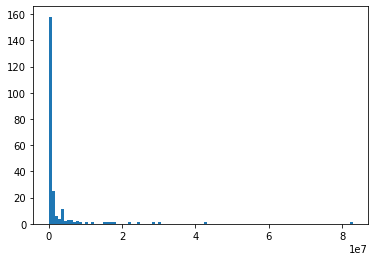

In [71]:
data_1 = filtered_covid_data[filtered_covid_data['Date'] =='2022-04-27']
plt.hist(data_1['Total Cases'], bins=100)
plt.show()

**Nhận xét**: Đa số tổng ca nhiễm của các nước tập trung trong khoảng từ 0 đến 10000000 ca, số nước có số ca nhiễm từ trước đến nay nhiều hơn 10000000 ca rất ít

### Câu hỏi 2: Diễn biến số ca nhiễm mới trong 7 ngày gần nhất (21/4 - 27/4)

Ở câu hỏi này ta sử dụng dữ liệu từ ngày 21/4/2022-27/4/2022 để trả lời

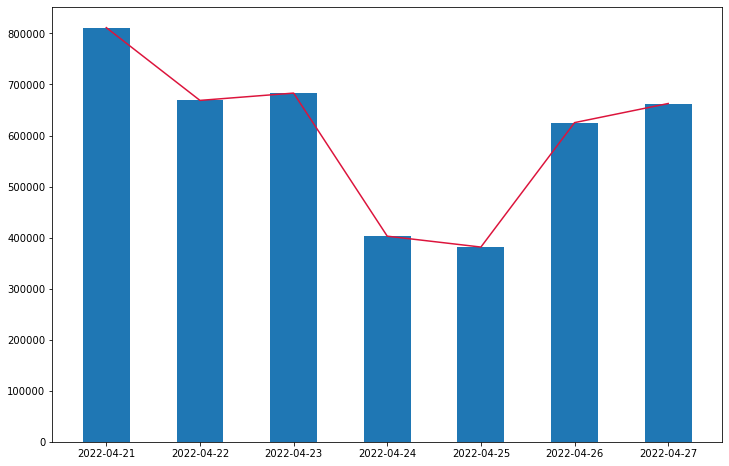

In [62]:
data_2 = filtered_covid_data.copy()
x = data_2.groupby('Date')['New Cases'].sum().to_frame()

plt.figure(figsize=(12, 8))
plt.plot(x.index, x['New Cases'], c='crimson')
plt.bar(x.index, x['New Cases'], width=0.5)
plt.show()

**Nhận xét:**

### Câu hỏi 3: Mật độ dân số ảnh hưởng như thế nào đến số ca nhiễm mỗi nước?

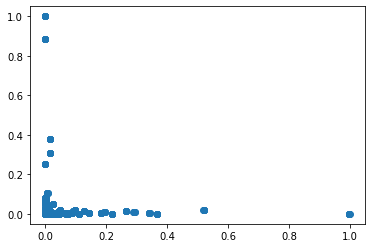

In [63]:
data_3 = filtered_covid_data.copy()
data_3['Density'] = data_3['Population'] / data_3['Area']
data_3 = data_3.select_dtypes(include=['float64', 'int64']).copy()
data_3 =(data_3-data_3.min())/(data_3.max()-data_3.min())
plt.scatter(data_3['Total Cases'], data_3['Density'])
plt.show()

**Nhận xét**

### Câu hỏi 4:  Những yếu tố để một nước có tỉ lệ nhiễm cao(Tot Cases/1M pop)?

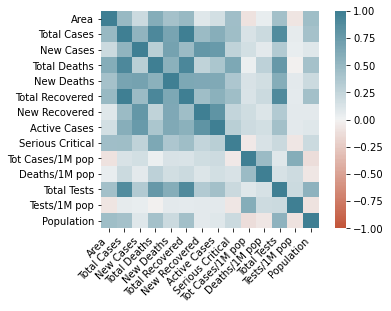

In [64]:
data_4 = filtered_covid_data.select_dtypes(include=['float64', 'int64']).copy()
data_4 =(data_4-data_4.min())/(data_4.max()-data_4.min())

corr = data_4.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

**Nhận xét**: Ta nhận thấy `Tests/1M pop` càng nhiều thì `Tot Cases/1M pop`  càng lớn. Có vẻ như càng test nhiều thì càng phát hiện được nhiều ca mắc covid hơn

### Câu hỏi 5:

In [65]:
data_5 = filtered_covid_data.copy()
data_5 = data_5.groupby(['Continent']).sum()
data_5

,Area,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
Continent,,,,,,,,,,,,,,
Africa,2.122284e+08,82701406,35286.0,1974456.0,181.0,1.290253e+08,14299.0,5886807.0,63954.0,12491603.0,132730.0,1.738285e+09,1.384615e+08,9.789288e+09
America,2.962945e+08,1081864380,510327.0,19448622.0,3581.0,1.085440e+09,503011.0,25024769.0,148985.0,54793563.0,577919.0,9.576404e+09,6.824525e+08,7.243309e+09
Asia,3.334333e+08,917514322,712192.0,11790891.0,3869.0,8.899131e+08,959466.0,23099402.0,123066.0,28257692.0,198617.0,1.534253e+10,4.929770e+08,3.271897e+10
Europe,4.798094e+07,1317042458,2107452.0,11059902.0,7712.0,1.199899e+09,4305067.0,82177481.0,75917.0,108692660.0,811019.0,1.811798e+10,1.432971e+09,4.853800e+09
Oceania,5.957692e+07,47924309,359989.0,982515.0,385.0,5.905855e+07,254797.0,3726878.0,19262.0,11516471.0,80250.0,1.779461e+09,1.790212e+08,3.029401e+08


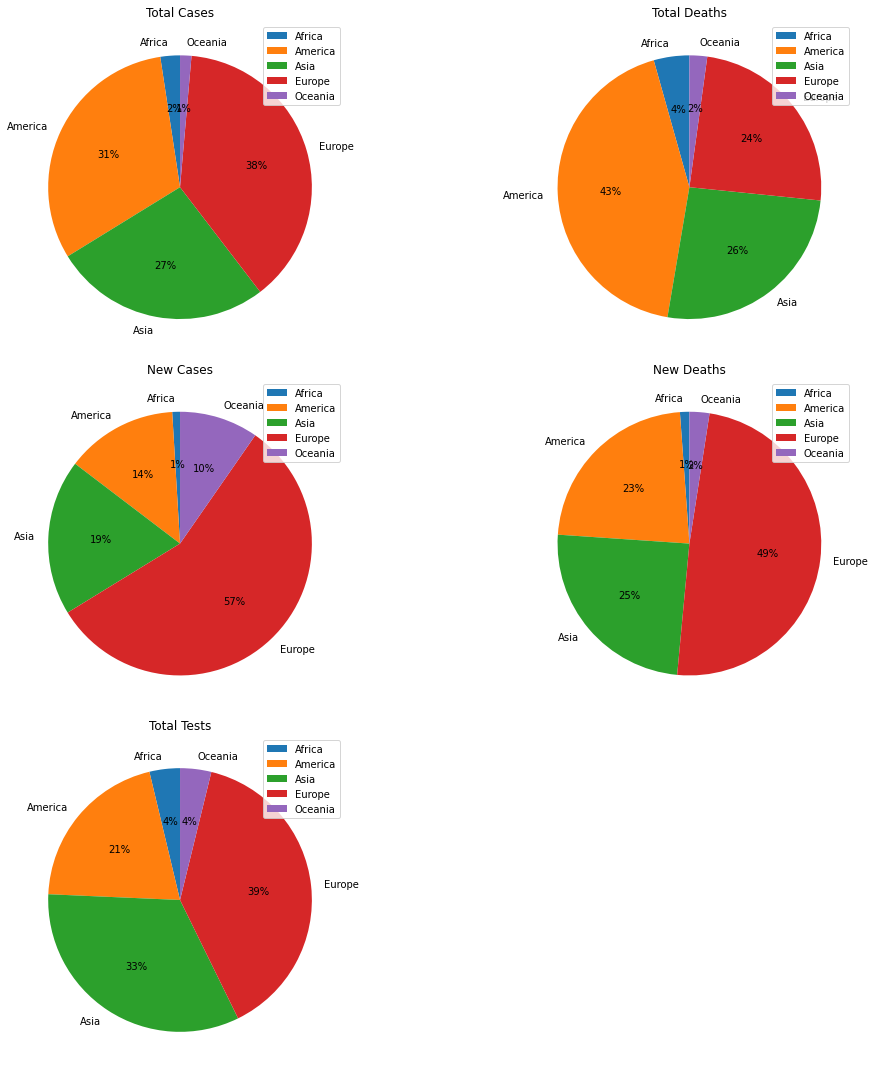

In [66]:
columns = ['Total Cases', 'Total Deaths', 'New Cases', 'New Deaths', 'Total Tests']
fig, axes = plt.subplots(3,2,figsize=(15,10))

data_to_plot = data_5[columns]

for c, ax in zip(data_to_plot.columns, axes.ravel()):
    data_to_plot[c].plot.pie(title=c, autopct='%1.0f%%', startangle=90, ylabel="", figsize=(15, 15), legend="Continent", ax=ax)

fig.delaxes(axes[2][1])
fig.tight_layout()